In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os, sys
from imageai.Detection import ObjectDetection
from imageai.Detection.Custom import DetectionModelTrainer
from PIL import Image
import matplotlib.pyplot as plt



C:\Users\Matt\anaconda3\envs\SmartMirror\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
train = DetectionModelTrainer()
train.setModelTypeAsTinyYOLOv3()
train.setDataDirectory(data_directory=r"C:\Users\Matt\OneDrive\GitHub\SmartMirror\SmartMirror\pics")
train.setTrainConfig(
    object_names_array=['matt'],
    batch_size=4,
    train_from_pretrained_model='./models/yolov3.pt',
    num_experiments=1000,
    
    )

In [ ]:
train.trainModel()

# Test Model

In [28]:
import imageai
imageai.__file__

'c:\\Users\\Matt\\anaconda3\\envs\\SmartMirror\\lib\\site-packages\\imageai\\__init__.py'

In [63]:
from imageai.Detection.Custom import CustomObjectDetection

model_path = r"C:\Users\Matt\OneDrive\GitHub\SmartMirror\SmartMirror\pics\models\tiny-yolov3_pics_mAP-0.01951_epoch-107.pt"
json_path = r"C:\Users\Matt\OneDrive\GitHub\SmartMirror\SmartMirror\pics\json\pics_tiny-yolov3_detection_config.json"
input_image = r"C:\Users\Matt\Desktop\imgs\julia\IMG_2681.JPEG"

detector = CustomObjectDetection()
detector.setModelTypeAsTinyYOLOv3()
detector.setModelPath(model_path)
detector.setJsonPath(json_path)
detector.loadModel()
detections = detector.detectObjectsFromImage(
    # objectness_treshold=.1,
    minimum_percentage_probability=50,
    input_image=input_image, 
    output_image_path='image3.jpg',
    )
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

matt  :  50.44  :  [1907, 2587, 2833, 3962]
matt  :  54.52  :  [1583, 2658, 2418, 3857]


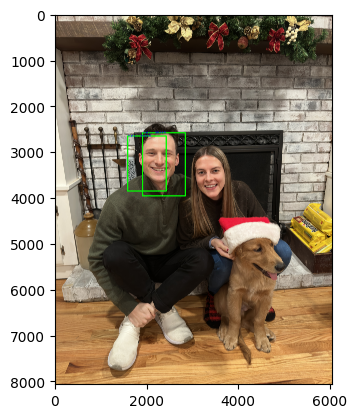

In [64]:
plt.imshow(Image.open('image3.jpg'))

In [17]:
from image_detection import Detect
d = Detect(custom_model=True)

# Detect from video

In [7]:
import cv2 
from imageai.Detection.Custom import CustomVideoObjectDetection

model = r"C:\Users\Matt\OneDrive\GitHub\SmartMirror\SmartMirror\models\final.pt"
json = r"C:\Users\Matt\OneDrive\GitHub\SmartMirror\SmartMirror\pics\json\pics_tiny-yolov3_detection_config.json"

detector = CustomVideoObjectDetection()
detector.setModelTypeAsTinyYOLOv3()
detector.setModelPath(model)
detector.setJsonPath(json)
detector.loadModel()


In [8]:
detector.camera = cv2.VideoCapture(0)

In [9]:
video_path = detector.detectObjectsFromVideo(   
    frames_per_second=20, 
    log_progress=True,
    camera_input = detector.camera,
    save_detected_video=True,
    output_file_path='test',
    detection_timeout=5,
)


Processing Frame :  1
Processing Frame :  2
Processing Frame :  3
Processing Frame :  4
Processing Frame :  5
Processing Frame :  6
Processing Frame :  7
Processing Frame :  8
Processing Frame :  9
Processing Frame :  10
Processing Frame :  11
Processing Frame :  12
Processing Frame :  13
Processing Frame :  14
Processing Frame :  15
Processing Frame :  16
Processing Frame :  17
Processing Frame :  18
Processing Frame :  19
Processing Frame :  20
Processing Frame :  21
Processing Frame :  22
Processing Frame :  23
Processing Frame :  24
Processing Frame :  25
Processing Frame :  26
Processing Frame :  27
Processing Frame :  28
Processing Frame :  29
Processing Frame :  30
Processing Frame :  31
Processing Frame :  32
Processing Frame :  33
Processing Frame :  34
Processing Frame :  35
Processing Frame :  36
Processing Frame :  37
Processing Frame :  38
Processing Frame :  39
Processing Frame :  40
Processing Frame :  41
Processing Frame :  42
Processing Frame :  43
Processing Frame :  